# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [160]:
# If on colab, uncomment the following lines

!wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-11-06 08:15:02--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.3’

car_data.csv.3      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2023-11-06 08:15:02 (5.73 MB/s) - ‘car_data.csv.3’ saved [58374/58374]



In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [162]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,55,94,36,66,151,61,8,133,50,18,135,154,265,119,62,9,3,201,208
1,211,86,37,69,150,63,8,138,48,18,134,163,284,124,71,1,6,189,195
2,391,91,38,70,160,66,25,140,47,18,139,162,296,130,67,4,11,192,202
3,338,97,45,91,161,63,10,151,45,19,148,166,334,171,65,18,20,197,205
4,514,89,38,74,138,59,7,136,49,18,133,167,278,128,72,7,7,189,193
5,464,100,49,80,206,70,6,183,35,21,156,206,517,198,73,3,13,198,199
6,616,92,42,69,153,58,8,140,48,18,138,165,290,151,64,10,21,199,206
7,763,102,52,98,225,71,10,214,31,24,164,228,682,199,71,0,16,187,196
8,87,86,37,60,115,54,5,119,56,17,132,141,209,129,72,2,8,186,190
9,576,109,53,103,210,63,11,219,30,25,172,229,707,212,71,6,3,188,199


Methods `describe` and `info` deliver some useful information.

In [163]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,412.240437,93.777778,44.899818,82.111111,168.865209,61.810565,8.502732,169.029144,40.852459,20.597450,148.127505,188.406193,440.429872,174.834244,72.566485,6.167577,12.468124,188.754098,195.493625
std,244.505856,8.209049,6.210053,15.748492,32.601946,6.935614,4.313712,32.883935,7.698119,2.554528,14.710657,30.612972,175.155002,32.899591,7.092304,4.992071,8.952500,6.182711,7.433799
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,200.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,149.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,406.000000,93.000000,44.000000,80.000000,167.000000,62.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,624.000000,100.000000,50.000000,98.000000,197.000000,66.000000,10.000000,199.000000,46.000000,23.000000,160.000000,217.000000,595.000000,197.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,252.000000,126.000000,55.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [164]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


Let's get rid of duplicates:

In [165]:
len(X_train_pd)-len(X_train_pd.drop_duplicates())

0

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Let's remove outliers:

In [166]:
from matplotlib import pyplot as plt

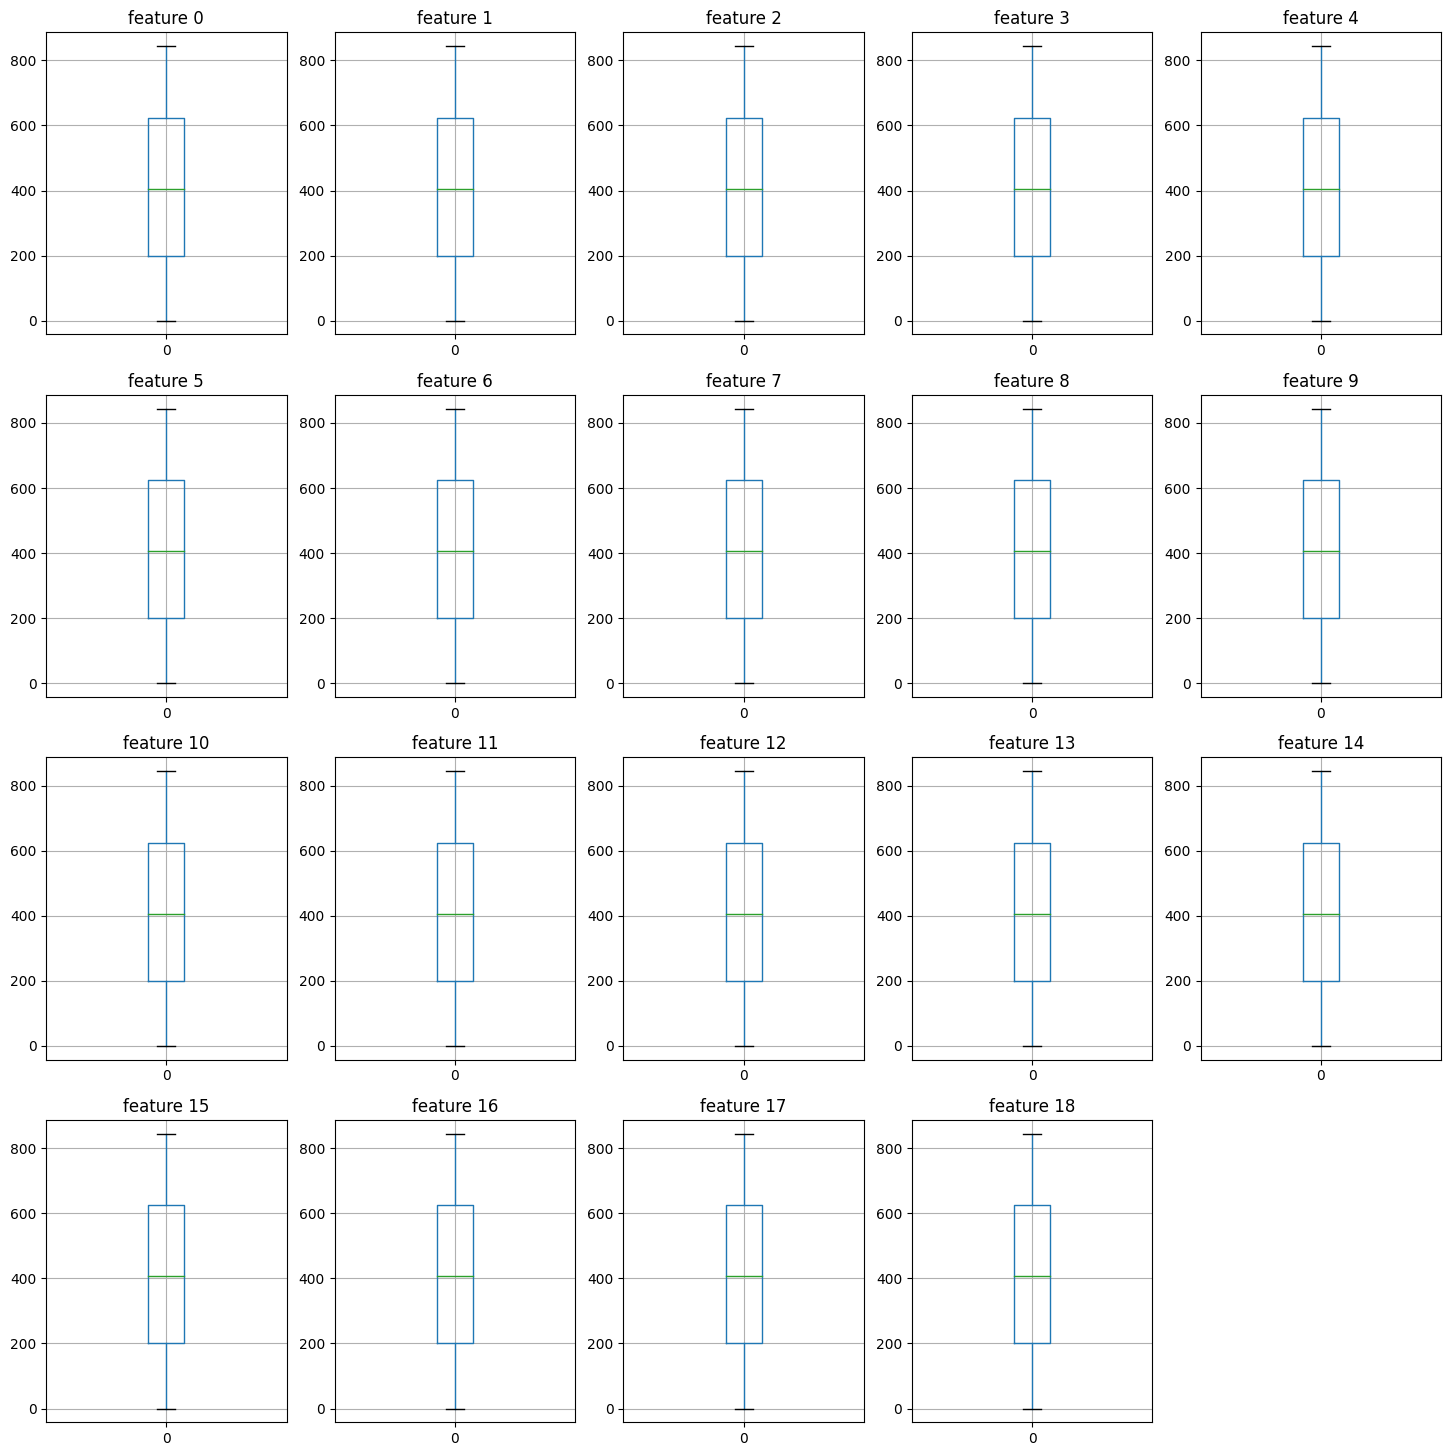

In [167]:
plt.figure(figsize=(18, 10))
plt.subplots_adjust(top=1.5)

for i, column in enumerate(X_train_pd.columns):
    plt.subplot(4, 5, i + 1)
    X_train_pd.boxplot(column=[0])
    plt.title(f'feature {column}')


As we can see, there are no outliers here.

All features are numeric. Thus, we don't need to encode categorial features.

In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_pd_scaled = scaler.fit_transform(X_train_pd)
pd.DataFrame(X_train_pd_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,6.471245e-18,7.539001e-16,-4.238666e-16,-2.070799e-16,-3.494472e-16,4.529872e-16,8.412619e-17,-1.860483e-16,4.740187e-16,-4.821078e-16,-5.759408e-16,-3.203266e-16,2.426717e-17,3.300335e-16,-1.294249e-17,9.949540e-17,4.206309e-17,-1.346019e-15,5.824121e-17
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.687552e+00,-2.533391e+00,-1.917966e+00,-2.549304e+00,-1.991426e+00,-2.137384e+00,-1.276801e+00,-1.674962e+00,-1.931122e+00,-1.409548e+00,-2.049873e+00,-1.876935e+00,-1.425351e+00,-2.002891e+00,-1.914590e+00,-1.236601e+00,-1.393968e+00,-2.064746e+00,-1.951471e+00
25%,-8.688299e-01,-8.264001e-01,-7.897334e-01,-7.697344e-01,-8.554895e-01,-6.942359e-01,-3.486794e-01,-6.705169e-01,-1.020979e+00,-6.259108e-01,-7.571146e-01,-6.671944e-01,-6.824743e-01,-7.859613e-01,-6.444520e-01,-8.356008e-01,-8.349551e-01,-7.696355e-01,-7.396804e-01
50%,-2.554593e-02,-9.483280e-02,-1.450291e-01,-1.341739e-01,-5.726378e-02,2.733833e-02,-1.166491e-01,-3.661397e-01,2.792240e-01,-2.340921e-01,-1.447553e-01,-3.402376e-01,-4.424680e-01,-5.580364e-02,-7.994598e-02,-2.340997e-01,-1.641399e-01,-1.220801e-01,6.818009e-02
75%,8.668614e-01,7.586624e-01,8.220273e-01,1.009835e+00,8.637659e-01,6.045977e-01,3.474115e-01,9.122445e-01,6.692850e-01,9.413642e-01,8.078037e-01,9.348940e-01,8.832811e-01,6.743540e-01,3.434335e-01,5.679017e-01,7.302802e-01,6.873641e-01,7.413971e-01
max,1.767456e+00,3.075292e+00,2.272612e+00,1.899620e+00,2.552320e+00,9.263488e+00,1.078878e+01,2.921134e+00,2.359549e+00,3.292277e+00,2.576842e+00,3.256287e+00,3.300487e+00,2.834404e+00,7.682011e+00,3.174406e+00,3.189936e+00,2.791919e+00,2.087831e+00


In [169]:
X_test_scaled = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [170]:
np.random.seed(42)

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [172]:
logreg_grid = {
    'multi_class': ['multinomial'],
    'solver': ['saga'],
    'tol': [1e-4, 1e-3],
    'max_iter': [500, 1000, 1500],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1],
}

In [173]:
regressor = LogisticRegression(n_jobs=-1)
logreg_grid_search = GridSearchCV(regressor, param_grid=logreg_grid, refit=True)

In [174]:
logreg_grid_search.fit(X_train_pd_scaled, y_train)
print(f'best params: {logreg_grid_search.best_params_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

best params: {'C': 1, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [175]:
best_estimator = logreg_grid_search.best_estimator_

In [176]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

!pip install scikit-plot

In [177]:
from sklearn.metrics import f1_score, accuracy_score
import scikitplot

In [178]:
y_pred = best_estimator.predict(X_test_scaled)
print(f'f1 score: {f1_score(y_test, y_pred, average="macro")}')
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')

f1 score: 0.7655493615264786
accuracy score: 0.7609427609427609


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

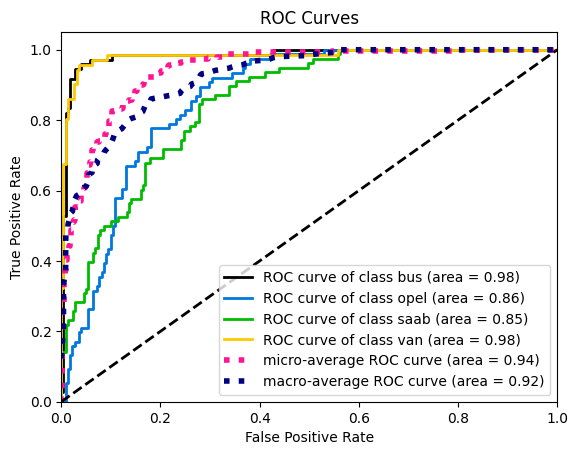

In [179]:
pred_proba = best_estimator.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_test, pred_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [180]:
from sklearn.decomposition import PCA

In [181]:
pca = PCA()
X_train_pd_scaled_pca = pca.fit_transform(X_train_pd_scaled)

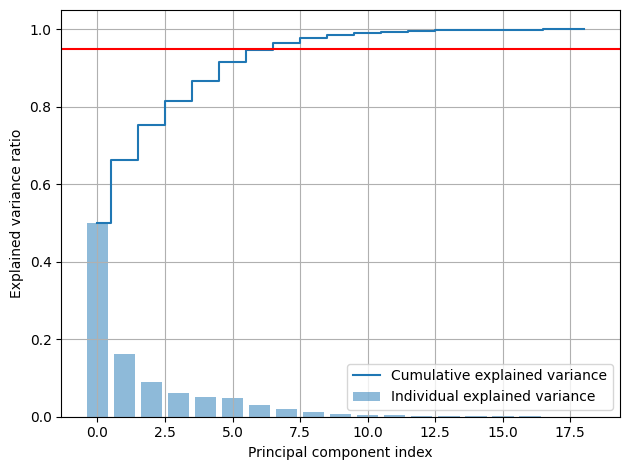

In [182]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=0.95, c='red')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)
plt.show()

Note that we need to normalize our data to use PCA. Let's get singular values, just for interest:

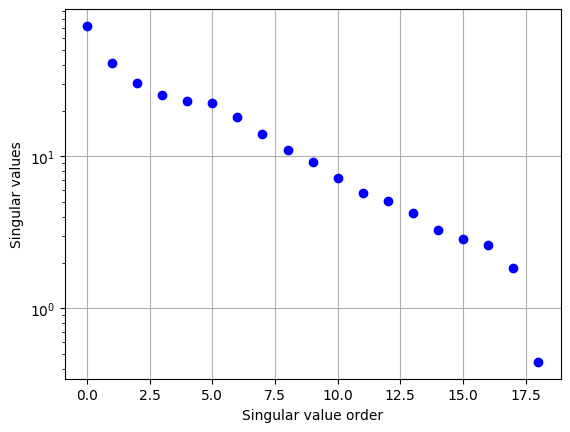

In [183]:
u, singular_values, tmp = np.linalg.svd(X_train_pd_scaled)
plt.plot(singular_values, 'bo')

plt.ylabel("Singular values")
plt.xlabel("Singular value order")
plt.yscale('log')

plt.grid(True)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

The largest singular values correspond to the largest variance values. Let's use just two first components.

In [184]:
pca = PCA(n_components=7)
X_train_pd_scaled_pca = pca.fit_transform(X_train_pd_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [185]:
logreg_grid_search.fit(X_train_pd_scaled_pca, y_train)
print(f'best params: {logreg_grid_search.best_params_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

best params: {'C': 1, 'max_iter': 500, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/joblib/_parallel_backends.py", line 273, in _wrap_func_call
    return func()
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 589, in __call__
    return [func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 589, in <listcomp>
    return [func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-pac

In [186]:
best_estimator = LogisticRegression(**logreg_grid_search.best_params_)
best_estimator.fit(X_train_pd_scaled_pca, y_train)

LogisticRegression(C=1, max_iter=500, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.001)

In [187]:
y_pred = best_estimator.predict(X_test_scaled_pca)
print(f'f1 score: {f1_score(y_test, y_pred, average="macro")}')
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')

f1 score: 0.559058393797169
accuracy score: 0.569023569023569


It’s not surprising that the quality of the model has dropped, because we left only two features.

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

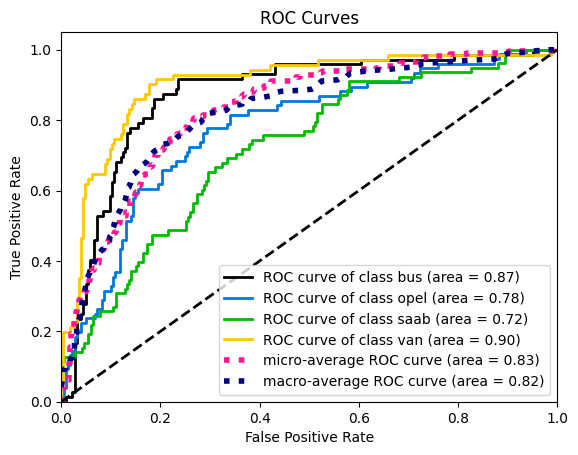

In [188]:
pred_proba = best_estimator.predict_proba(X_test_scaled_pca)
scikitplot.metrics.plot_roc(y_test, pred_proba)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [189]:
from sklearn.tree import DecisionTreeClassifier

tree_grid = {
    'max_depth': [1, 2, 4, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 10],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_leaf_nodes': [5, 10, 15, 20],
}

tree = DecisionTreeClassifier()
tree_grid_search = GridSearchCV(tree, param_grid=tree_grid, refit=True)

In [190]:
tree_grid_search.fit(X_train_pd_scaled, y_train)
print(f'best params: {tree_grid_search.best_params_}')

best params: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 4}


In [191]:
best_estimator = tree_grid_search.best_estimator_
y_pred = best_estimator.predict(X_test_scaled)
print(f'f1 score: {f1_score(y_test, y_pred, average="macro")}')
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')

f1 score: 0.6839208649039467
accuracy score: 0.6835016835016835


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

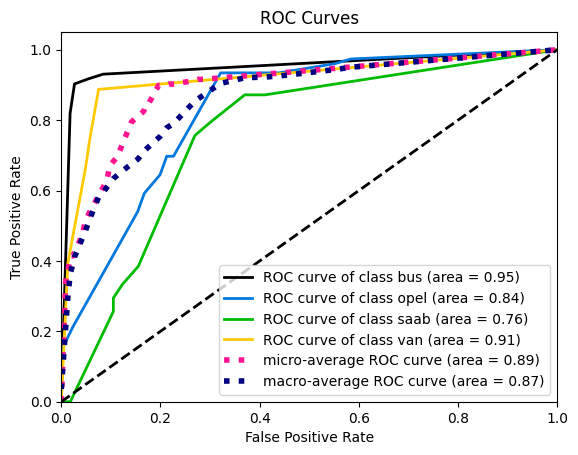

In [192]:
pred_proba = best_estimator.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_test, pred_proba)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [193]:
N_min, N_max = 2, 100
bootstrap_size = int(0.8 * len(X_train))
ensemble_size_list = np.arange(N_min, N_max, 5)

In [194]:
score_type_list = ['f1', 'accuracy']

ensemble_models = {
    'logreg': {
        'f1': {},
        'accuracy': {},
    },
    'tree': {
        'f1': {},
        'accuracy': {},
    },
}

In [195]:
from tqdm import tqdm

logreg_models = []
tree_models = []
scalers = []

for i in tqdm(range(N_max)):
    idx = np.random.choice(np.arange(len(X_train_pd)), size=bootstrap_size)
    bootstrap_train_sample = X_train_pd.iloc[idx]

    bootstrap_train_sample = scaler.fit_transform(bootstrap_train_sample)
    scalers.append(scaler)

    logreg = LogisticRegression(**logreg_grid_search.best_params_)
    logreg.fit(bootstrap_train_sample, pd.DataFrame(y_train).iloc[idx])

    tree = DecisionTreeClassifier(**tree_grid_search.best_params_)
    tree.fit(bootstrap_train_sample, pd.DataFrame(y_train).iloc[idx])

    # logreg_grid_search.fit(bootstrap_train_sample, pd.DataFrame(y_train).iloc[idx])
    logreg_models.append(logreg)

    # tree_grid_search.fit(bootstrap_train_sample, pd.DataFrame(y_train).iloc[idx])
    tree_models.append(tree)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  1%|          | 1/100 [00:00<00:39,  2.54it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  2%|▏         | 2/100 [00:00<00:36,  2.65it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  3%|▎         | 3/100 [00:01<00:38,  2.50it/s]/usr/local/lib/python3.10/dist-

In [196]:
for ensemble_size in ensemble_size_list:
    ensemble_pred = []
    X_test_scaled = scalers[ensemble_size].transform(X_test)
    for i in range(ensemble_size):
        ensemble_pred.append(logreg_models[i].predict(X_test_scaled))
    y_pred = []
    for i in range(len(X_test)):
        count = {}
        max_class = ""
        max_class_count = 0
        for j in range(ensemble_size):
            if ensemble_pred[j][i] in count:
                count[ensemble_pred[j][i]] += 1
            else:
                count[ensemble_pred[j][i]] = 1
            if (max_class_count < count[ensemble_pred[j][i]]):
                max_class_count = count[ensemble_pred[j][i]]
                max_class = ensemble_pred[j][i]
        y_pred.append(max_class)

    ensemble_models['logreg']['f1'][ensemble_size] = f1_score(y_test, y_pred, average="macro")
    ensemble_models['logreg']['accuracy'][ensemble_size] = accuracy_score(y_test, y_pred)

    ensemble_pred = []
    for i in range(ensemble_size):
        ensemble_pred.append(tree_models[i].predict(X_test_scaled))
    y_pred = []
    for i in range(len(X_test)):
        count = {}
        max_class = ""
        max_class_count = 0
        for j in range(ensemble_size):
            if ensemble_pred[j][i] in count:
                count[ensemble_pred[j][i]] += 1
            else:
                count[ensemble_pred[j][i]] = 1
            if (max_class_count < count[ensemble_pred[j][i]]):
                max_class_count = count[ensemble_pred[j][i]]
                max_class = ensemble_pred[j][i]
        y_pred.append(max_class)

    ensemble_models['tree']['f1'][ensemble_size] = f1_score(y_test, y_pred, average="macro")
    ensemble_models['tree']['accuracy'][ensemble_size] = accuracy_score(y_test, y_pred)

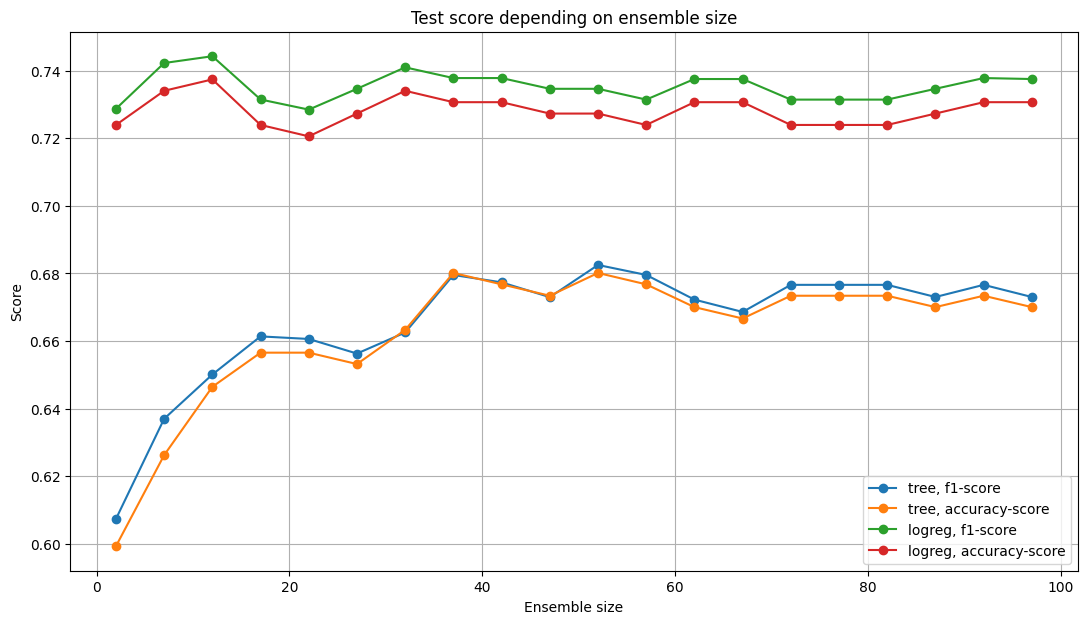

In [197]:
plt.figure(figsize=(13, 7))

plt.plot(ensemble_size_list, ensemble_models['tree']['f1'].values(), marker='o', label='tree, f1-score')
plt.plot(ensemble_size_list, ensemble_models['tree']['accuracy'].values(), marker='o', label='tree, accuracy-score')

plt.plot(ensemble_size_list, ensemble_models['logreg']['f1'].values(), marker='o', label='logreg, f1-score')
plt.plot(ensemble_size_list, ensemble_models['logreg']['accuracy'].values(), marker='o', label='logreg, accuracy-score')

plt.title('Test score depending on ensemble size')
plt.xlabel('Ensemble size')
plt.ylabel('Score')

plt.grid(True)
plt.legend()

Thus, the accuracy of the decision tree ensemble increases as the ensemble size increases. The accuracy of the logistic regression ensemble does not change much with changing sample size.

In [198]:
best_logreg_ensemble_size = max(ensemble_models['logreg']['accuracy'], key=ensemble_models['logreg']['accuracy'].get)
print(f'best logreg ensemble size: {best_logreg_ensemble_size}')

best logreg ensemble size: 12


In [199]:
best_tree_ensemble_size = max(ensemble_models['tree']['accuracy'], key=ensemble_models['tree']['accuracy'].get)
print(f'best tree ensemble size: {best_tree_ensemble_size}')

best tree ensemble size: 37


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [200]:
X_train_pd_scaled = scaler.fit_transform(X_train_pd)
X_test_scaled = scaler.transform(X_test)

In [201]:
from sklearn.ensemble import RandomForestClassifier

forest_size_list = ensemble_size_list

rf_score = {
    'f1': {},
    'accuracy': {},
}

for forest_size in tqdm(forest_size_list):
    classifier = RandomForestClassifier(n_estimators=forest_size, **tree_grid_search.best_params_)
    classifier.fit(X_train_pd_scaled, y_train)
    rf_score['f1'][forest_size] = f1_score(y_test, classifier.predict(X_test_scaled), average='macro')
    rf_score['accuracy'][forest_size] = accuracy_score(y_test, classifier.predict(X_test_scaled))

100%|██████████| 20/20 [00:02<00:00,  7.29it/s]


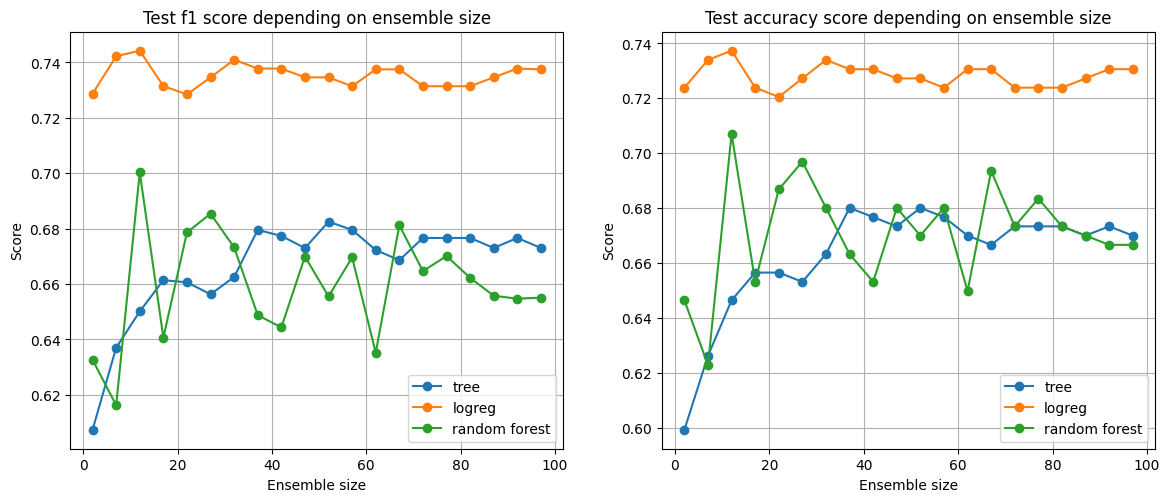

In [202]:
plt.figure(figsize=(14, 3))
plt.subplots_adjust(top=1.5)

for i, score_type in enumerate(score_type_list):
    plt.subplot(1, 2, i + 1)
    plt.plot(ensemble_size_list, ensemble_models['tree'][score_type].values(), marker='o', label='tree')
    plt.plot(ensemble_size_list, ensemble_models['logreg'][score_type].values(), marker='o', label='logreg')
    plt.plot(ensemble_size_list, rf_score[score_type].values(), marker='o', label='random forest')

    plt.title(f'Test {score_type} score depending on ensemble size')
    plt.xlabel('Ensemble size')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend()

In [203]:
best_rf_estimators_count = max(rf_score['accuracy'], key=rf_score['accuracy'].get)
print(f'best random forest size: {best_rf_estimators_count}')

best random forest size: 12


The random forest implementation from the sklearn library has proven to perform better than our own implementation of tree bagging. The optimal number of trees for a finished implementation of random forest is different from the same number for our own implementation of bagging. This can be explained by the fact that the quality function for in both cases is not monotonic and we cannot identify any obvious dependence of quality on the number of trees.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [204]:
one_tenth_size = int(len(X_train) / 10)
train_sample_size_list = np.arange(one_tenth_size, len(X_train), one_tenth_size)

logreg = LogisticRegression(**logreg_grid_search.best_params_)
tree = DecisionTreeClassifier(**tree_grid_search.best_params_)
random_forest = RandomForestClassifier(n_estimators=best_rf_estimators_count, **tree_grid_search.best_params_)

In [205]:
models_score = {
    'logreg': {
        'f1': {},
        'accuracy': {},
    },
    'tree': {
        'f1': {},
        'accuracy': {},
    },
    'random forest': {
        'f1': {},
        'accuracy': {},
    },
}

In [206]:
for train_sample_size in tqdm(train_sample_size_list):
    logreg.fit(X_train_pd_scaled[0:train_sample_size], y_train[0:train_sample_size])
    tree.fit(X_train_pd_scaled[0:train_sample_size], y_train[0:train_sample_size])
    random_forest.fit(X_train_pd_scaled[0:train_sample_size], y_train[0:train_sample_size])

    models_score['logreg']['f1'][train_sample_size] = f1_score(y_test, logreg.predict(X_test_scaled), average='macro')
    models_score['logreg']['accuracy'][train_sample_size] = accuracy_score(y_test, logreg.predict(X_test_scaled))
    models_score['tree']['f1'][train_sample_size] = f1_score(y_test, tree.predict(X_test_scaled), average='macro')
    models_score['tree']['accuracy'][train_sample_size] = accuracy_score(y_test, tree.predict(X_test_scaled))
    models_score['random forest']['f1'][train_sample_size] = f1_score(y_test, random_forest.predict(X_test_scaled), average='macro')
    models_score['random forest']['accuracy'][train_sample_size] = accuracy_score(y_test, random_forest.predict(X_test_scaled))

100%|██████████| 10/10 [00:01<00:00,  7.02it/s]


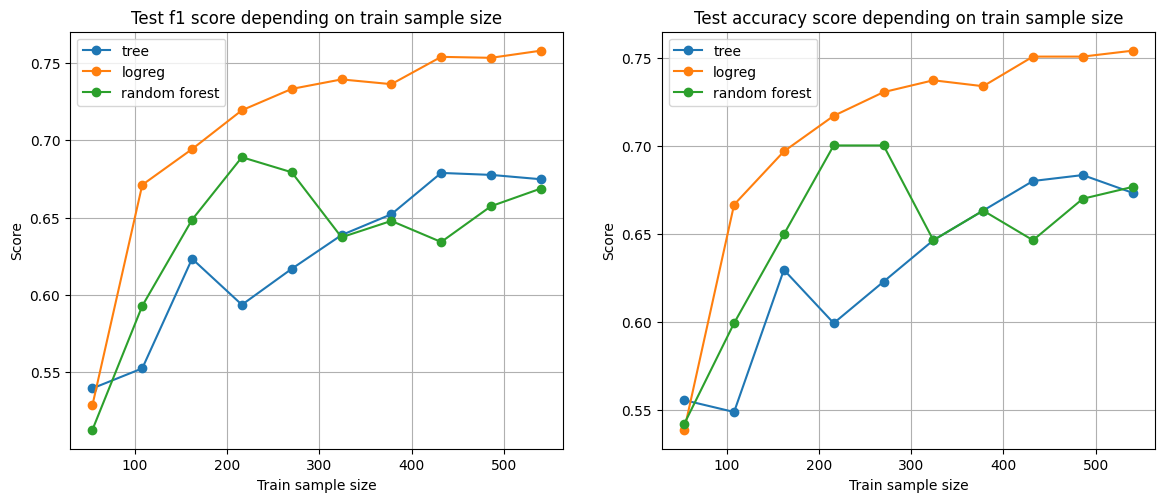

In [207]:
plt.figure(figsize=(14, 3))
plt.subplots_adjust(top=1.5)

for i, score_type in enumerate(score_type_list):
    plt.subplot(1, 2, i + 1)
    plt.plot(train_sample_size_list, models_score['tree'][score_type].values(), marker='o', label='tree')
    plt.plot(train_sample_size_list, models_score['logreg'][score_type].values(), marker='o', label='logreg')
    plt.plot(train_sample_size_list, models_score['random forest'][score_type].values(), marker='o', label='random forest')

    plt.title(f'Test {score_type} score depending on train sample size')
    plt.xlabel('Train sample size')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend()

The best quality is shown by the logistic regression model, followed by a random forest, and then a decision tree. As the size of the training set increases, on average the quality increases. Obviously, the quality of the random forest must exceed the quality of the decision tree, since the random forest is an ensemble of decision trees. The quality of the random forest decreases with a sufficiently large training sample size, which means overfitting.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [208]:
!pip install catboost

In [213]:
from catboost import CatBoostClassifier

grid = {
    'num_trees': [1, 5, 25, 50, 100, 250, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000, 5000, 10000],
}

score = {
    'accuracy': {

    },
    'f1': {

    }
}

for num_trees in grid['num_trees']:
    CBC = CatBoostClassifier(num_trees=num_trees)
    CBC.fit(X_train_pd_scaled, y_train)
    score['accuracy'][num_trees] = accuracy_score(y_test, CBC.predict(X_test_scaled))
    score['f1'][num_trees] = f1_score(y_test, CBC.predict(X_test_scaled), average='macro')

Streaming output truncated to the last 5000 lines.
5000:	learn: 0.0575067	total: 30.8s	remaining: 30.8s
5001:	learn: 0.0574911	total: 30.8s	remaining: 30.8s
5002:	learn: 0.0574669	total: 30.8s	remaining: 30.8s
5003:	learn: 0.0574505	total: 30.8s	remaining: 30.7s
5004:	learn: 0.0574429	total: 30.8s	remaining: 30.7s
5005:	learn: 0.0574296	total: 30.8s	remaining: 30.7s
5006:	learn: 0.0574105	total: 30.8s	remaining: 30.7s
5007:	learn: 0.0573888	total: 30.8s	remaining: 30.7s
5008:	learn: 0.0573794	total: 30.8s	remaining: 30.7s
5009:	learn: 0.0573613	total: 30.8s	remaining: 30.7s
5010:	learn: 0.0573496	total: 30.8s	remaining: 30.7s
5011:	learn: 0.0573331	total: 30.8s	remaining: 30.7s
5012:	learn: 0.0573228	total: 30.8s	remaining: 30.7s
5013:	learn: 0.0573143	total: 30.8s	remaining: 30.7s
5014:	learn: 0.0573003	total: 30.9s	remaining: 30.7s
5015:	learn: 0.0572866	total: 30.9s	remaining: 30.7s
5016:	learn: 0.0572715	total: 30.9s	remaining: 30.7s
5017:	learn: 0.0572577	total: 30.9s	remaining: 3

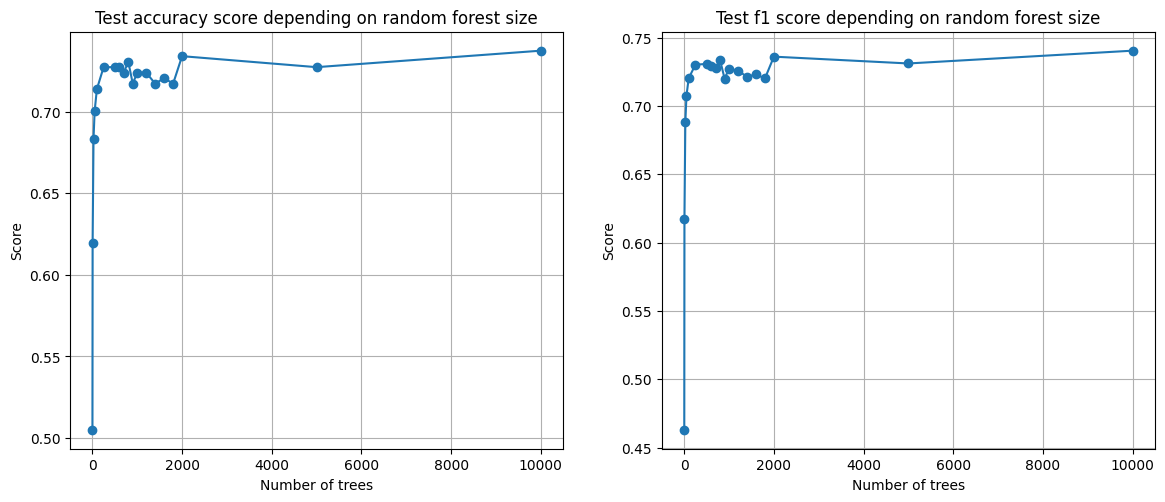

In [214]:
plt.figure(figsize=(14, 3))
plt.subplots_adjust(top=1.5)

for i, score_type in enumerate(score):
    plt.subplot(1, 2, i + 1)
    plt.title(f'Test {score_type} score depending on random forest size')
    plt.xlabel('Number of trees')
    plt.ylabel('Score')
    plt.plot(score[score_type].keys(), score[score_type].values(), marker='o')
    plt.grid(True)

Indeed, as the size of trees in gradient boosting increases, the quality of the model increases. This is explained by the fact that the task of the next tree in gradient boosting is to reduce the error of the previous ones.